In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [19]:
#import libraries
import numpy as np
import random as rnd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# reading the dataset file 
df = pd.read_csv('/content/gdrive/My Drive/glass.csv')

X = df.drop(['Type'], axis=1)
Y = df["Type"]

#splitting the dataset into training set and testing set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25,random_state = 0)

In [12]:
#instantiating the Naive Bayes model and fitting it with traning set
gnb = GaussianNB()
gnb.fit(X_Train,Y_Train)

# Predicting the Test set result
Y_Pred = gnb.predict(X_Test)

#evaluating the model
print("Gaussian Naive Bayers Accuracy is:",round(accuracy_score(Y_Test,Y_Pred) * 100,2))
print("\nClassification Report:\n\n",metrics.classification_report(Y_Test,Y_Pred,zero_division=0))

Gaussian Naive Bayers Accuracy is: 46.3

Classification Report:

               precision    recall  f1-score   support

           1       0.32      0.64      0.43        14
           2       0.45      0.21      0.29        24
           3       0.50      0.40      0.44         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.46        54
   macro avg       0.49      0.54      0.49        54
weighted avg       0.49      0.46      0.44        54



In [13]:
#instantiating the linear SVM model and fitting it with traning set
svc = SVC(kernel='linear')
svc.fit(X_Train, Y_Train)

# Predicting the Test set result
Y_pred = svc.predict(X_Test)

#evaluating the model
print("SVM accuracy is:", round(accuracy_score(Y_Test,Y_pred) * 100, 2))
print("\nClassification Report:\n\n",metrics.classification_report(Y_Test,Y_pred,zero_division=0))

SVM accuracy is: 55.56

Classification Report:

               precision    recall  f1-score   support

           1       0.43      0.86      0.57        14
           2       0.60      0.38      0.46        24
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.56        54
   macro avg       0.45      0.54      0.47        54
weighted avg       0.53      0.56      0.51        54



In [14]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


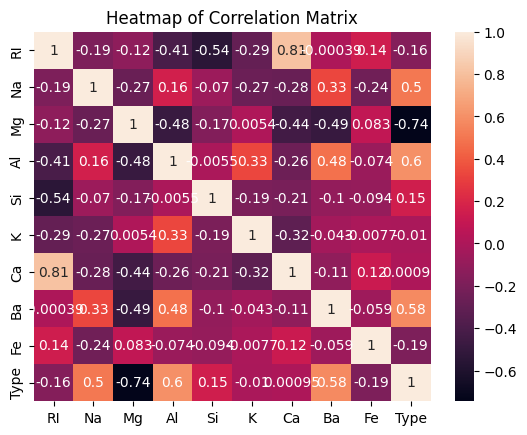

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()